In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
#for dirname, _, filenames in os.walk('/Users/zoeouyang/Desktop/academics/capstone/'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('/Users/zoeouyang/Desktop/academics/capstone/yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
# Create a new data frame that only contains the following columns
df_1 = df[['business_id','stars','text','useful']]


# Create 2 new variables, one for representing pos/neg attitude, 
# one for picking out comments that are within the neutral-negative range.
df_1["attitude"] = np.where(df_1["stars"] >= 3, 1, 0)
target_star = [2,3]
df_1["target"] = df_1.stars.isin(target_star)
df_1['text'] = df_1['text'].str.lower()


# First, let's only look at the actual text and the overall attitude
df_final = df_1[['text', 'attitude']]

# Dividing the reviews to positive and negative
pos = df_final[df_final['attitude']==1]['text']
neg = df_final[df_final['attitude']==0]['text']


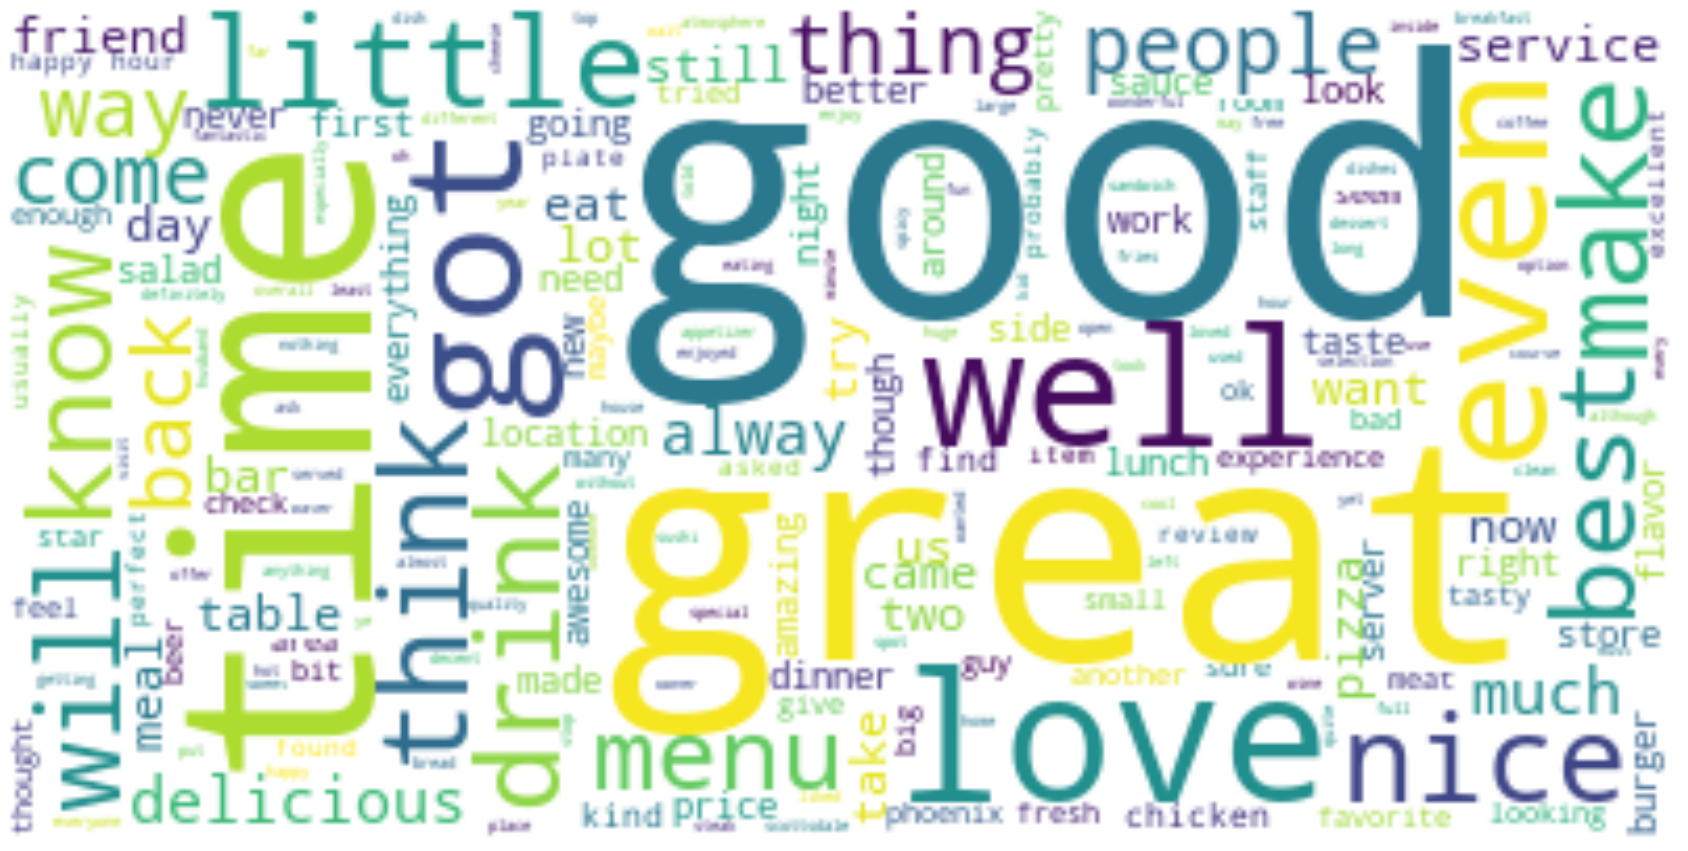

In [4]:
# Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import string
import collections



# Generate a wordcloud - all comments
stopwords = set(STOPWORDS)
stopwords.update(['place','one','order','said','really','go','see','actually','say','very',
                     'went','ordered','something','restaurant','food'])

all_review = df_final['text'].str.split(' ')
all_review.head()
all_review_cleaned = []


for text in all_review:
    text = [x.strip(string.punctuation) for x in text]
    all_review_cleaned.append(text)

wc_text = [" ".join(text) for text in all_review_cleaned]
final_wc_text = " ".join(wc_text)
final_wc_text[:500]

# Create a word cloud image
wc_pos = WordCloud(stopwords = stopwords, background_color="white").generate(final_wc_text)


plt.figure(figsize=(30,30))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

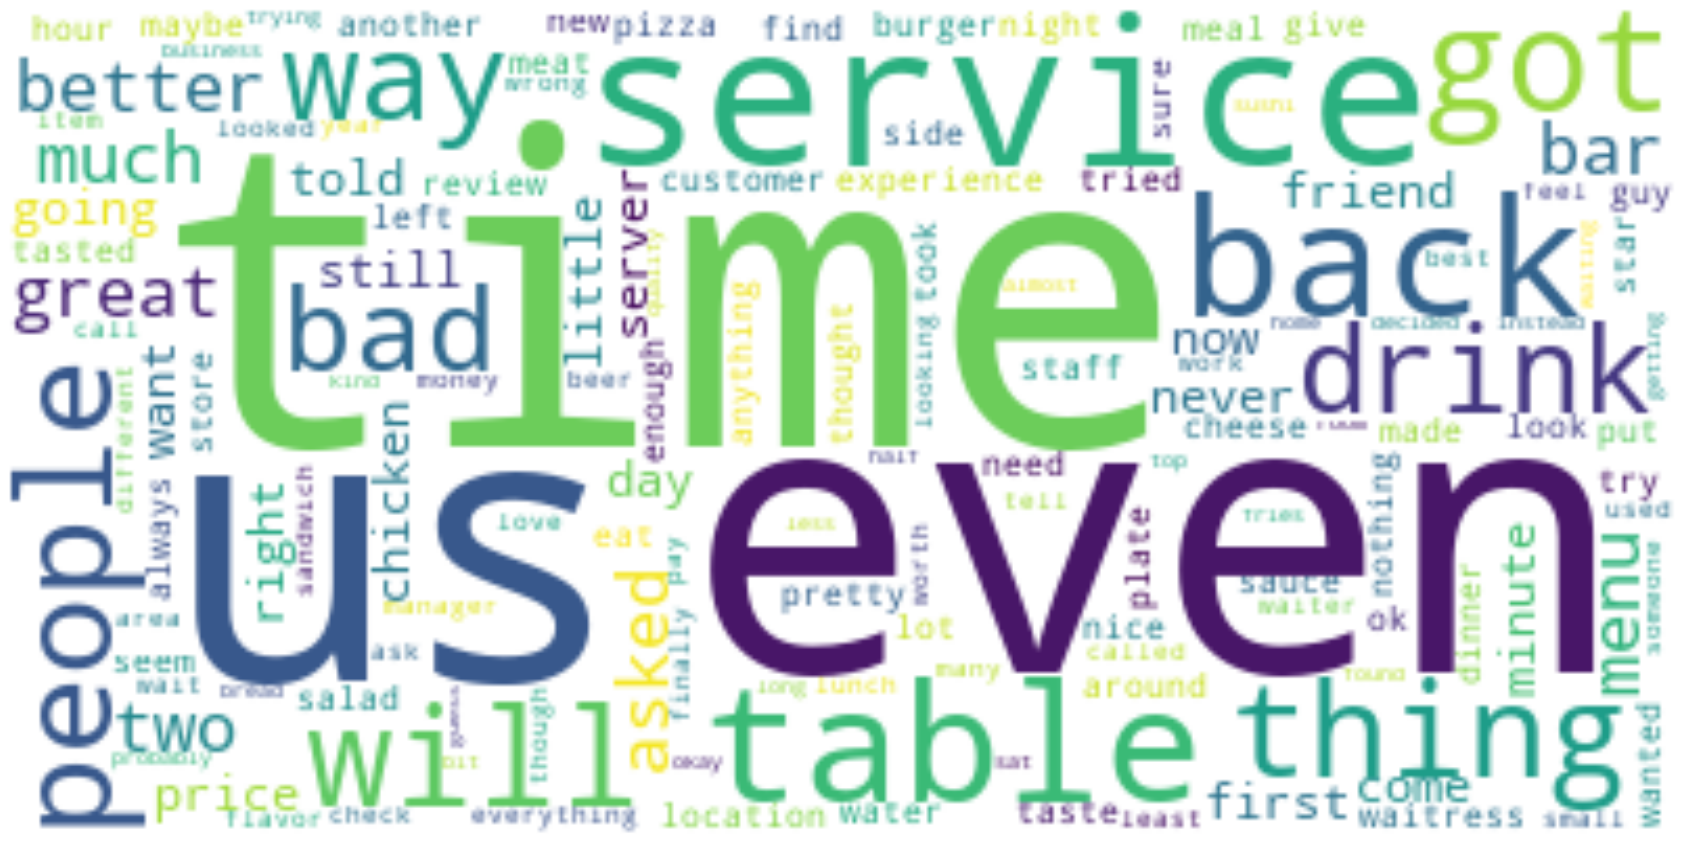

In [5]:
# Generate a wordcloud - negative reviews
stopwords.update(['good','well','know','think','make','think','take','came'])
neg_review = neg.str.split(' ')
neg_review_cleaned = []


for text in neg_review:
    text = [x.strip(string.punctuation) for x in text]
    neg_review_cleaned.append(text)

neg_text = [" ".join(text) for text in neg_review_cleaned]
neg_wc_text = " ".join(neg_text)
neg_wc_text[:500]

neg_pos = WordCloud(stopwords = stopwords, background_color="white").generate(neg_wc_text)


plt.figure(figsize=(30,30))
plt.imshow(neg_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# Even after updating the stopwords, we still cannot dig out enough useful information just 
# by looking at the wordclouds. 


# Extract the most frequently appeared words in negative reviews.
filtered_neg_review = [word for word in neg_wc_text.split() if word not in stopwords]
counted_neg_review = collections.Counter(filtered_neg_review)

word_count_neg = {}
for letter,count in counted_neg_review.most_common(30):
    word_count_neg[letter] = count

for i,j in word_count_neg.items():
    print('Word: {0}, Count:{1}'.format(i, j))

Word: service, Count:689
Word: back, Count:651
Word: time, Count:644
Word: us, Count:554
Word: even, Count:549
Word: will, Count:503
Word: got, Count:427
Word: never, Count:398
Word: better, Count:383
Word: much, Count:380
Word: people, Count:376
Word: minutes, Count:359
Word: first, Count:351
Word: going, Count:343
Word: way, Count:342
Word: bad, Count:338
Word: great, Count:328
Word: two, Count:320
Word: asked, Count:319
Word: table, Count:304
Word: another, Count:296
Word: told, Count:291
Word: bar, Count:289
Word: 2, Count:287
Word: chicken, Count:281
Word: want, Count:277
Word: right, Count:273
Word: experience, Count:266
Word: menu, Count:264
Word: give, Count:256


In [ ]:
# First, we want to see if we can create models that can successfully predict neg/pos reviews

# Further clean the data, remove urls, quotation marks, hashtags and numbers
import re
def function_clean(text):
    text = re.sub(r"http\S+", "", text) 
    text = re.sub("@[^\s]*", "", text)
    text = re.sub("#[^\s]*", "", text)
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

df_final['text'] = df_final['text'].apply(lambda text: function_clean(text))
    
# Preparation: splitting data into train and test set (7:3)   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final["text"]
y = df_final["attitude"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [9]:
import nltk
def my_tokenizer(sentence):
    listofwords = sentence.strip().split()          
    listof_words = []    
    for word in listofwords:
        if not word in stopwords:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mapping words into vectors, extract features that have document frequency 
# equal or higher than 10. 
vect_1 = TfidfVectorizer(min_df = 10, tokenizer=my_tokenizer, stop_words=stopwords, 
                         ngram_range=(1,3)).fit(X_train)
X_train1 = vect_1.transform(X_train)
X_test1 = vect_1.transform(X_test)  

new_df_words = pd.DataFrame(columns=vect_1.get_feature_names(), data=X_train1.toarray())

word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vect_1.get_feature_names())
words_df = pd.DataFrame({"word":words, "count":word_counts})
words_df.sort_values(by="count",ascending=False).head(20)

/Users/zoeouyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


,word,count
2216,great,212.622691
4482,service,144.225000
5200,time,129.355023
2987,love,122.637726
315,back,115.328232
5680,will,107.085720
117,always,106.618177
455,best,106.407316
3406,nice,105.686997
2905,little,93.776651


In [11]:
from imblearn.over_sampling import SMOTE

# SMOTE the training data
sm = SMOTE(random_state=6)
X_bal, y_bal = sm.fit_resample(X_train1, y_train)
y_bal.value_counts()

1    5809
0    5809
Name: attitude, dtype: int64

In [12]:
# Fitting Models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import classification_report

# Fitting Logistic regression to the training set
logreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=6)
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
# Score on training set: 0.9335714285714286
print(f"Score on test set: {logreg.score(X_test1,y_test)}")
# Score on test set: 0.867

conf_matrix = confusion_matrix(y_test, y_pred_logreg)
df_conf_matrix_logreg = pd.DataFrame(data = conf_matrix,columns = ['Pred 0','Pred 1'],
                                     index = ['True 0','True 1'])
print('The Confusion Matirx')
display(df_conf_matrix_logreg)
print('The Classification Report')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report
# Though the overall accuracy is not bad, the logistic model does not perform well in 
# classifying negative reviews

Score on training set: 0.9335714285714286
Score on test set: 0.867
The Confusion Matirx


,Pred 0,Pred 1
True 0,374,111
True 1,288,2227


The Classification Report


,precision,recall,f1-score,support
0,0.564955,0.771134,0.652136,485.000
1,0.952524,0.885487,0.917783,2515.000
accuracy,0.867000,0.867000,0.867000,0.867
macro avg,0.758739,0.828311,0.784959,3000.000
weighted avg,0.889867,0.867000,0.874837,3000.000


In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

review_random_forest = RandomForestClassifier(random_state=6)
review_random_forest.fit(X_bal, y_bal)
print(f"Random Forest: {review_random_forest.score(X_bal, y_bal)}")
# Random Forest: 0.9998278533310381
print(f"Random Forest: {review_random_forest.score(X_test1, y_test)}")
# Random Forest: 0.874

# Tuning Hyperparameters: n_estimators, max_features, min_sample_leaf
# https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

Random Forest: 0.9998278533310381
Random Forest: 0.874
